In [3]:
# Cell 1: Initial Inspection of the Maize Dataset
import pandas as pd
import numpy as np

# --- Load the Maize Dataset ---
file_path = '../personal/maize_ITnorth_core42_1982_2016_allstressors_with_monthly.csv'

try:
    df_maize = pd.read_csv(file_path)

    print("--- Maize Dataset Inspection ---")
    
    # 1. Shape: How many rows and columns?
    print(f"\nShape: {df_maize.shape}")

    # 2. Columns: What are all the variable names?
    print("\nColumns:")
    print(df_maize.columns.tolist())

    # 3. Head: Show me the first few rows.
    print("\nData Preview (first 5 rows):")
    print(df_maize.head().to_string())

    # 4. Missing Values: Are there any NaNs?
    print("\nMissing Value Check (sum of NaNs per column):")
    print(df_maize.isnull().sum())

except FileNotFoundError:
    print(f"ERROR: File not found at the specified path: {file_path}")
    print("Please ensure the 'personal' folder is in the root of the 'climarisc' directory.")
except Exception as e:
    print(f"An error occurred: {e}")

--- Maize Dataset Inspection ---

Shape: (1470, 34)

Columns:
['lat', 'lon', 'year', 'yield_maize', 'temperature', 'precipitation', 'soil_water', 'solar_radiation', 'potential_evaporation', 'temperature_May', 'temperature_Jun', 'temperature_Jul', 'temperature_Aug', 'temperature_Sep', 'precipitation_May', 'precipitation_Jun', 'precipitation_Jul', 'precipitation_Aug', 'precipitation_Sep', 'soil_water_May', 'soil_water_Jun', 'soil_water_Jul', 'soil_water_Aug', 'soil_water_Sep', 'solar_radiation_May', 'solar_radiation_Jun', 'solar_radiation_Jul', 'solar_radiation_Aug', 'solar_radiation_Sep', 'potential_evaporation_May', 'potential_evaporation_Jun', 'potential_evaporation_Jul', 'potential_evaporation_Aug', 'potential_evaporation_Sep']

Data Preview (first 5 rows):
     lat    lon  year  yield_maize  temperature  precipitation  soil_water  solar_radiation  potential_evaporation  temperature_May  temperature_Jun  temperature_Jul  temperature_Aug  temperature_Sep  precipitation_May  precipitat

In [4]:
# Cell 2: Discover Growing Seasons for All Other Crops
import pandas as pd
import os

# --- List of all the dataset files ---
file_paths = [
    '../personal/rice_ITnorth_core41_1982_2016_allstressors_with_monthly.csv',
    '../personal/soybean_ITnorth_core41_1982_2016_allstressors_with_monthly.csv',
    '../personal/wheat_spring_ITnorth_core41_1982_2016_allstressors_with_monthly.csv',
    '../personal/wheat_winter_ITnorth_core41_1982_2016_allstressors_with_monthly.csv'
]

print("--- Discovering Growing Seasons from Column Names ---")

for path in file_paths:
    try:
        # We use nrows=0 to read only the header row, which is very fast
        df_header = pd.read_csv(path, nrows=0)
        
        # Extract the crop name from the filename for a clean title
        crop_name = os.path.basename(path).replace('_ITnorth_core41_1982_2016_allstressors_with_monthly.csv', '')
        
        print(f"\n--- {crop_name.upper()} ---")
        print("Columns:")
        print(df_header.columns.tolist())
        
    except FileNotFoundError:
        print(f"\nERROR: File not found: {path}")
    except Exception as e:
        print(f"\nERROR processing {path}: {e}")

--- Discovering Growing Seasons from Column Names ---

--- RICE ---
Columns:
['year', 'lat', 'lon', 'yield_rice', 'temperature', 'precipitation', 'soil_water', 'solar_radiation', 'potential_evaporation', 'temperature_May', 'temperature_Jun', 'temperature_Jul', 'temperature_Aug', 'temperature_Sep', 'precipitation_May', 'precipitation_Jun', 'precipitation_Jul', 'precipitation_Aug', 'precipitation_Sep', 'soil_water_May', 'soil_water_Jun', 'soil_water_Jul', 'soil_water_Aug', 'soil_water_Sep', 'solar_radiation_May', 'solar_radiation_Jun', 'solar_radiation_Jul', 'solar_radiation_Aug', 'solar_radiation_Sep', 'potential_evaporation_May', 'potential_evaporation_Jun', 'potential_evaporation_Jul', 'potential_evaporation_Aug', 'potential_evaporation_Sep']

--- SOYBEAN ---
Columns:
['year', 'lat', 'lon', 'yield_soybean', 'temperature', 'precipitation', 'soil_water', 'solar_radiation', 'potential_evaporation', 'temperature_May', 'temperature_Jun', 'temperature_Jul', 'temperature_Aug', 'temperature_S

--- Generating Correlation Heatmaps for Each Crop ---

--- Processing: MAIZE ---


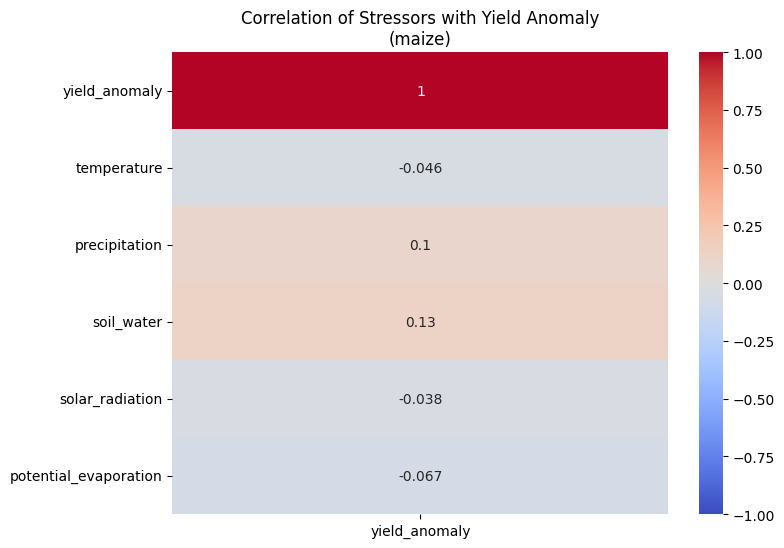


--- Processing: RICE ---


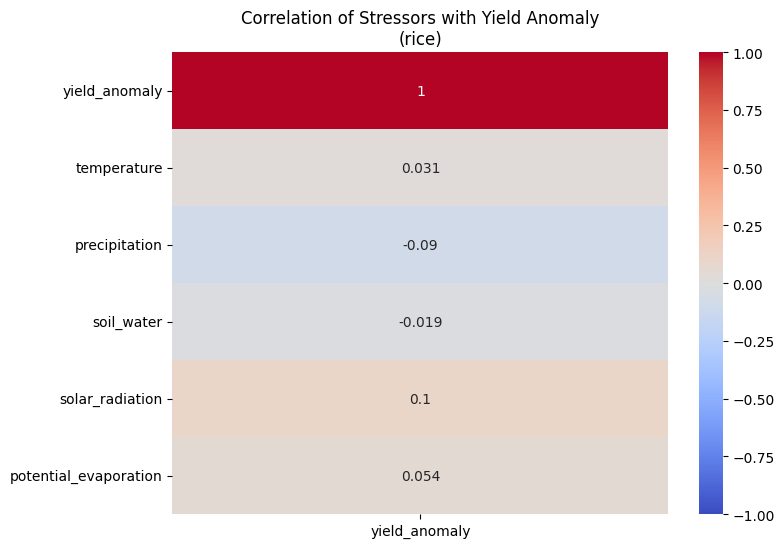


--- Processing: SOYBEAN ---


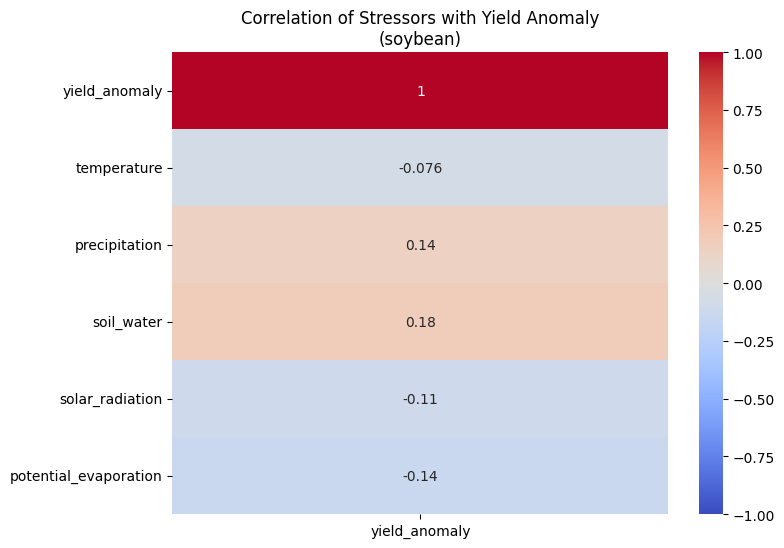


--- Processing: WHEAT_SPRING ---


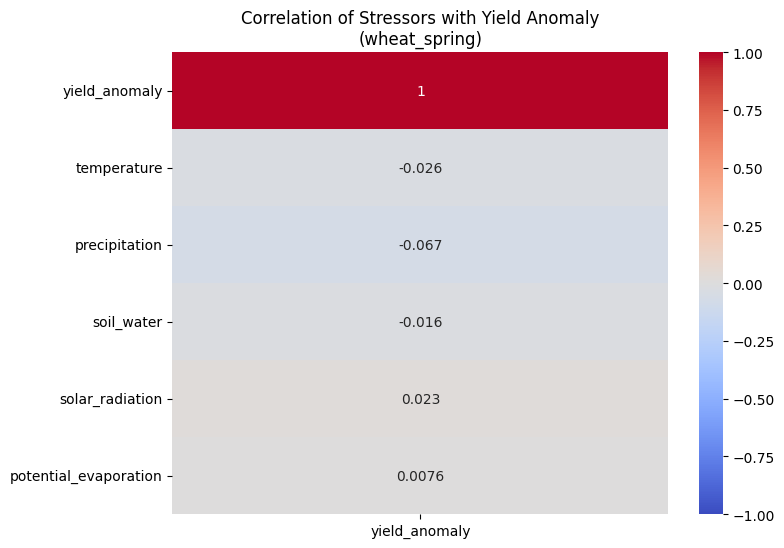


--- Processing: WHEAT_WINTER ---


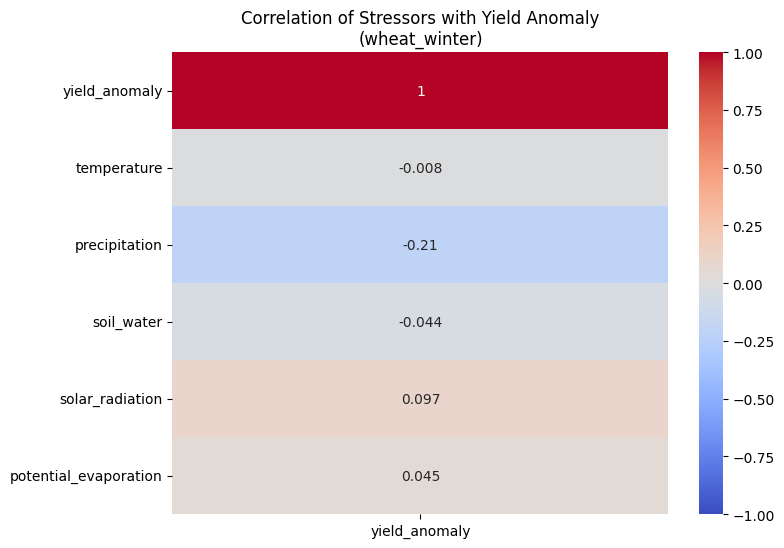

In [5]:
# Cell 3: Generate Correlation Heatmaps for All Crops
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import detrend

# --- List of all the dataset files and their yield column names ---
file_info = {
    'maize': {'path': '../personal/maize_ITnorth_core42_1982_2016_allstressors_with_monthly.csv', 'yield_col': 'yield_maize'},
    'rice': {'path': '../personal/rice_ITnorth_core41_1982_2016_allstressors_with_monthly.csv', 'yield_col': 'yield_rice'},
    'soybean': {'path': '../personal/soybean_ITnorth_core41_1982_2016_allstressors_with_monthly.csv', 'yield_col': 'yield_soybean'},
    'wheat_spring': {'path': '../personal/wheat_spring_ITnorth_core41_1982_2016_allstressors_with_monthly.csv', 'yield_col': 'yield_wheat_spring'},
    'wheat_winter': {'path': '../personal/wheat_winter_ITnorth_core41_1982_2016_allstressors_with_monthly.csv', 'yield_col': 'yield_wheat_winter'}
}

print("--- Generating Correlation Heatmaps for Each Crop ---")

for crop_name, info in file_info.items():
    print(f"\n--- Processing: {crop_name.upper()} ---")
    
    try:
        # --- 1. Load the data ---
        df = pd.read_csv(info['path'])
        
        # --- 2. Calculate Yield Anomaly (De-trending) ---
        # We must de-trend the data within each grid cell group
        df['yield_anomaly'] = df.groupby(['lat', 'lon'])[info['yield_col']].transform(lambda x: detrend(x))
        
        # --- 3. Select Columns for Correlation ---
        # We only want the yield anomaly and the summary stressors
        cols_to_correlate = [
            'yield_anomaly', 'temperature', 'precipitation', 'soil_water',
            'solar_radiation', 'potential_evaporation'
        ]
        df_corr = df[cols_to_correlate]
        
        # --- 4. Calculate and Plot the Heatmap ---
        corr_matrix = df_corr.corr()
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_matrix[['yield_anomaly']], annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
        plt.title(f'Correlation of Stressors with Yield Anomaly\n({crop_name})')
        plt.show()

    except FileNotFoundError:
        print(f"ERROR: File not found: {info['path']}")
    except Exception as e:
        print(f"An error occurred while processing {crop_name}: {e}")

--- Generating Monthly Temperature Correlation Heatmaps ---

--- Processing: MAIZE ---


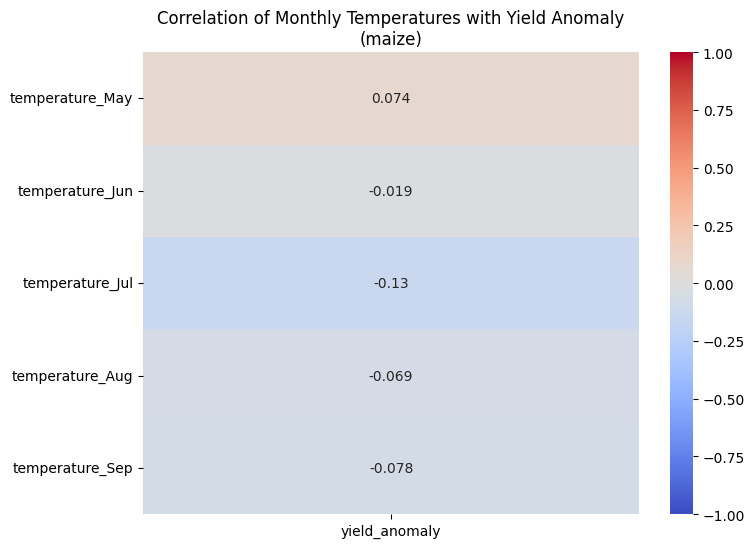


--- Processing: RICE ---


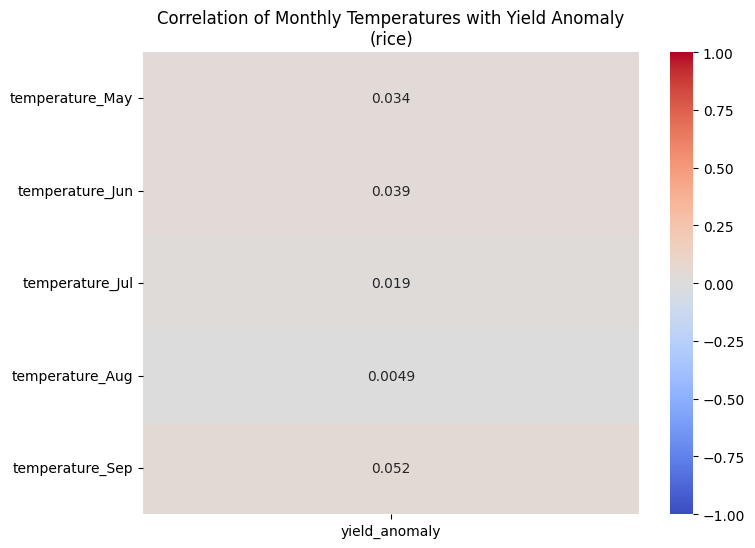


--- Processing: SOYBEAN ---


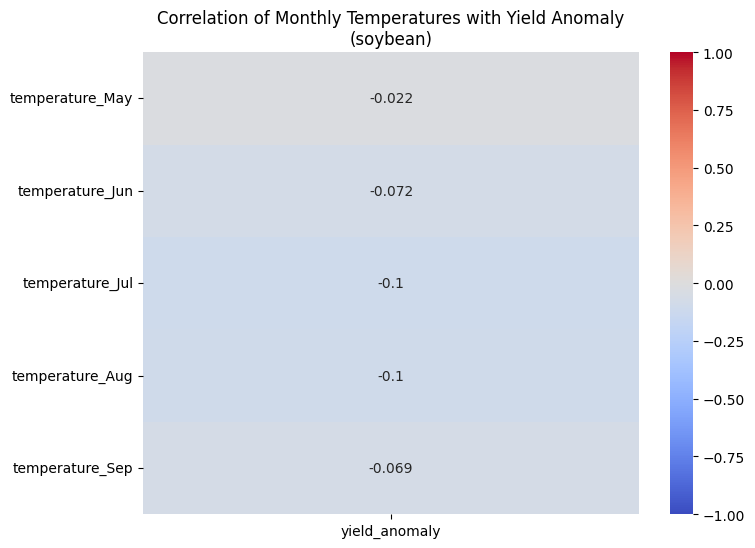


--- Processing: WHEAT_SPRING ---


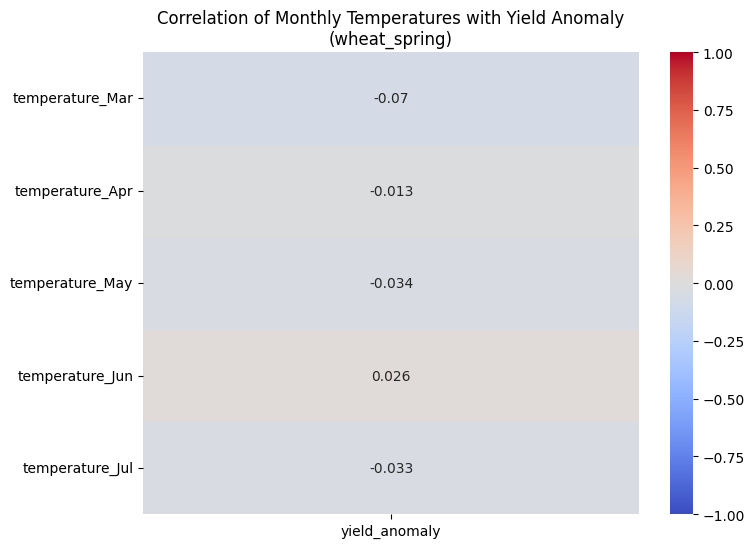


--- Processing: WHEAT_WINTER ---


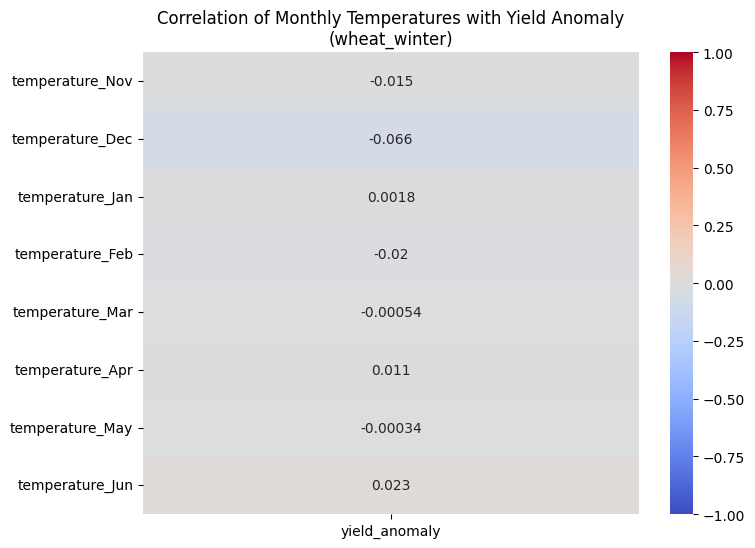

In [6]:
# Cell 4: Monthly Temperature Correlation Analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import detrend

print("--- Generating Monthly Temperature Correlation Heatmaps ---")

for crop_name, info in file_info.items():
    print(f"\n--- Processing: {crop_name.upper()} ---")
    
    try:
        df = pd.read_csv(info['path'])
        
        # Calculate Yield Anomaly
        df['yield_anomaly'] = df.groupby(['lat', 'lon'])[info['yield_col']].transform(lambda x: detrend(x))
        
        # Find all columns that are monthly temperatures
        monthly_temp_cols = [col for col in df.columns if 'temperature_' in col]
        
        # Select columns for correlation
        cols_to_correlate = ['yield_anomaly'] + monthly_temp_cols
        df_corr = df[cols_to_correlate]
        
        # Calculate and Plot the Heatmap
        corr_matrix = df_corr.corr()
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_matrix.loc[monthly_temp_cols, ['yield_anomaly']], annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
        plt.title(f'Correlation of Monthly Temperatures with Yield Anomaly\n({crop_name})')
        plt.show()

    except Exception as e:
        print(f"An error occurred while processing {crop_name}: {e}")